# Setup DGL Environmnet

In [1]:
!nvidia-smi

Sun Apr 24 17:58:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
! chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
! bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

In [3]:
! python --version

Python 3.6.5 :: Anaconda, Inc.


In [4]:
! conda install -y -c rdkit rdkit==2018.09.3 
! conda install -y pytorch torchvision torchaudio cudatoolkit=11.1 -c pytorch -c conda-forge
! conda install -y -c dglteam dgl-cuda11.1

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [ ]:
! pip install dgllife torch

In [6]:
import dgllife
print(dgllife.__version__)

Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.


0.2.9


# Load DGL-LIFESCI

In [ ]:
# ! git clone https://github.com/awslabs/dgl-lifesci.git

Cloning into 'dgl-lifesci'...
remote: Enumerating objects: 3118, done.
remote: Counting objects: 100% (320/320), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 3118 (delta 154), reused 175 (delta 87), pack-reused 2798
Receiving objects: 100% (3118/3118), 957.07 KiB | 6.02 MiB/s, done.
Resolving deltas: 100% (1895/1895), done.


In [7]:
import os
os.chdir("/content/drive/MyDrive/moleculnet/dgl-lifesci/examples/property_prediction/moleculenet/")

In [8]:
!ls drive/MyDrive/moleculnet/dgl-lifesci

ls: cannot access 'drive/MyDrive/moleculnet/dgl-lifesci': No such file or directory


In [9]:
!pip install wandb -qqq
import wandb
import os
os.environ["WANDB_API_KEY"] = "7e40122ef4016b01cdc4a60bcd7ee7a251b020a7"

     |████████████████████████████████| 1.8 MB 12.7 MB/s 
     |████████████████████████████████| 279 kB 11.7 MB/s 
     |████████████████████████████████| 144 kB 33.9 MB/s 
     |████████████████████████████████| 1.1 MB 42.1 MB/s 
     |████████████████████████████████| 170 kB 13.9 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
     |████████████████████████████████| 603 kB 46.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 


In [47]:
!python -W ignore classification.py -d ToxCast -mo GAT -f canonical -wb toxcast_gatF

wandb: Currently logged in as: mayankk-om-dev (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.15
wandb: Run data is saved locally in /content/drive/MyDrive/moleculnet/dgl-lifesci/examples/property_prediction/moleculenet/wandb/run-20220424_200926-1htis48x
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run fiery-surf-1
wandb: ⭐️ View project at https://wandb.ai/mayankk-om-dev/toxcast_gatF
wandb: 🚀 View run at https://wandb.ai/mayankk-om-dev/toxcast_gatF/runs/1htis48x
Directory classification_results already exists.
Processing dgl graphs from scratch...
Processing molecule 1000/8597
Invalid mol found
Invalid mol found
Invalid mol found
Processing molecule 2000/8597
Invalid mol found
Invalid mol found
Invalid mol found
Processing molecule 3000/8597
Processing molecule 4000/8597
Invalid mol found
Invalid mol found
Processing molecule 5000/8597
Invalid mol found
Invalid mol found
Processing molecule 6000/8597
Invalid mol found
Invali

# Utils

In [19]:
from dgl.data.utils import get_download_dir, download, _get_dgl_url, extract_archive
import pandas as pd
_url = 'dataset/toxcast.zip'
data_path = 'toxcast.zip'
dir_path = 'toxcast'
download(_get_dgl_url(_url), path=data_path, overwrite=False)
extract_archive(data_path, dir_path)
df = pd.read_csv(dir_path + '/toxcast_data.csv')

Extracting file to toxcast


In [24]:
toxcast.head(3)

,smiles,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_OTIC_up,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up
0,[O-][N+](=O)C1=CC=C(Cl)C=C1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C[SiH](C)O[Si](C)(C)O[Si](C)(C)O[SiH](C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CN1CCN(CC1)C(=O)C1CCCCC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=round(val))
    return my_autopct

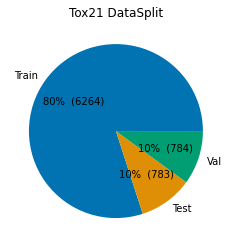

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [6264, 783, 784]
labels = ['Train', 'Test', "Val"]
colors = sns.color_palette('colorblind')
plt.pie(data, labels=labels,colors = colors, autopct = make_autopct(data))
plt.title('Tox21 DataSplit')
plt.show()

